1.1 Data Scraping Notebook

In [1]:
# Import packages
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import sys

# Add project root to Python path
current_dir = Path.cwd()
project_root = current_dir.parent

# Add the project root to sys.path if it's not already there
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Define main paths
raw_path = project_root / 'data' / 'raw'
procesed_path = project_root / 'data' / 'processed'

In [ ]:
# Run scraper.py

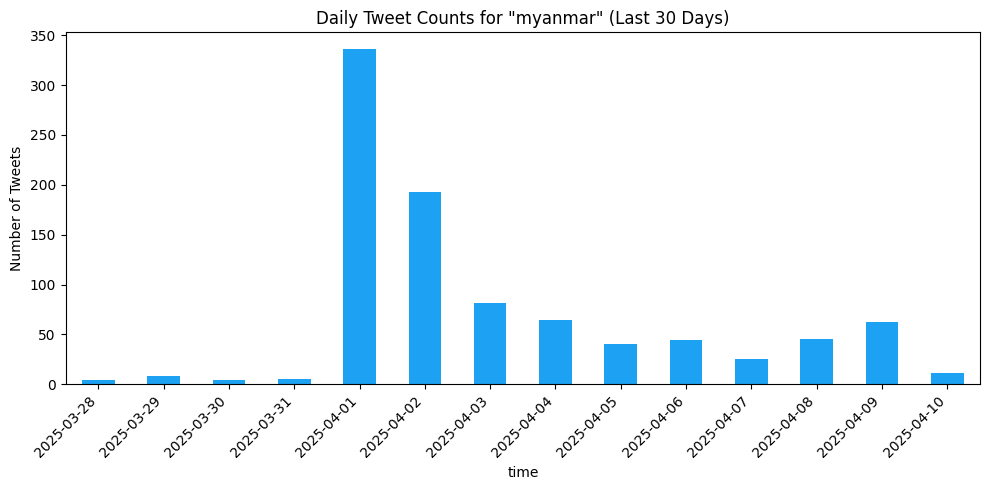

In [2]:
# Sentiment Analysis by country: Myanmar Example
import matplotlib.pyplot as plt

# Settings (Hard coded: query, csv name)
QUERY = 'myanmar'
CSV_NAME = 'myanmar_2025-04-10_12-56-19.csv'
target_file = raw_path / QUERY / CSV_NAME

# Load and prepare data
data = pd.read_csv(target_file)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d_%H-%M-%S')

# Filter last 30 days
recent_data = data[data['time'] >= (datetime.now() - pd.Timedelta(days=30))]

# Count tweets per day
daily_counts = recent_data['time'].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='bar', color='#1da1f2', width=0.5)  # Twitter blue
plt.title(f'Daily Tweet Counts for "{QUERY}" (Last 30 Days)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [ ]:
# Sentiment Analysis by type: Disaster Example
import seaborn as sns
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re

# Settings (Hard coded: query, csv name)
QUERY = 'disaster'
CSV_NAME = 'disaster_2025-04-10_13-43-26.csv'
target_file = raw_path / QUERY / CSV_NAME

# Load data
data = pd.read_csv(target_file)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d_%H-%M-%S')

# Filter last 30 days and prepare data
recent = data[data['time'] >= (datetime.now() - pd.Timedelta(days=30))]